In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../dataset/logi_Undersampling.csv',encoding='CP949')

In [3]:
df

,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),label
0,0.082208,0.674388,-0.079029,-0.826928,-0.214193,-0.705541,-0.551356,0.364327,-0.680366,-0.254485,0
1,0.042988,0.300990,0.974416,-0.006370,-0.529695,0.085582,-0.700173,0.372378,-0.510463,-0.251703,0
2,0.680942,-2.557668,-0.816031,-1.044134,0.265287,-1.829770,-0.772674,-0.927537,-1.430155,-0.272397,0
3,0.215724,1.082135,-0.136305,-0.302012,-0.459122,0.168859,2.601317,0.252307,-0.212902,-0.020250,0
4,-0.067580,0.441707,-0.666417,-0.235643,-0.664613,-0.851274,2.117363,-0.082687,0.204930,5.455231,0
...,...,...,...,...,...,...,...,...,...,...,...
1788,-2.321910,-2.760434,-0.725963,-0.277878,-1.187682,-1.330112,-0.568856,-1.148362,-1.430155,-0.276234,1
1789,0.269547,-2.025825,-0.507630,-0.428716,-0.731034,-1.142741,-0.562672,-0.478738,2.826654,-0.284362,1
1790,-0.307491,0.754165,-0.531943,2.666476,-1.088050,-0.393256,2.955926,2.585154,-1.002627,-0.242047,1
1791,-2.061554,-2.760434,-0.138746,0.784020,-0.423836,0.481144,0.525237,-0.969556,-1.430155,-0.293218,1


In [5]:
from sklearn.model_selection import train_test_split
logi_X = df.iloc[:,:-1]
logi_y = df['label']

In [6]:
logi_x_train, logi_x_test, logi_y_train, logi_y_test = train_test_split(logi_X, logi_y, test_size=0.2, random_state=0)

In [14]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(logi_x_train,logi_y_train)
lda_pred = lda_clf.predict(logi_x_test)
lda_pred_proba = lda_clf.predict_proba(logi_x_test)

In [15]:
from sklearn.model_selection import GridSearchCV


In [16]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(logi_x_train, logi_y_train)
dt_pred = dt_clf.predict(logi_x_test)
dt_pred_proba = dt_clf.predict_proba(logi_x_test)

In [17]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(logi_x_train, logi_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

KeyboardInterrupt: 

In [18]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.983
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=13)     
dt_clf_best.fit(logi_x_train, logi_y_train)
dt_best_pred = dt_clf_best.predict(logi_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(logi_x_test)

In [19]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(logi_x_train, logi_y_train)
rf_pred = rf_clf.predict(logi_x_test)
rf_pred_proba = rf_clf.predict_proba(logi_x_test)

In [16]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8,10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(logi_x_train,logi_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}, 최적 평균 정확도 :0.937


In [20]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'gini', 
# 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 80}
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'sqrt',
                                     max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=20)
rf_clf_best.fit(logi_x_train, logi_y_train)
rf_best_pred = rf_clf_best.predict(logi_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(logi_x_test)

In [21]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(logi_x_train, logi_y_train)
lr_pred = lr_clf.predict(logi_x_test)
lr_pred_proba = lr_clf.predict_proba(logi_x_test)


In [30]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(logi_x_train,logi_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.920


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [22]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.1, penalty= 'l2')
lr_clf.fit(logi_x_train, logi_y_train)
lr_best_pred = lr_clf.predict(logi_x_test)
lr_best_pred_proba = lr_clf.predict_proba(logi_x_test)

In [23]:

from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(logi_x_train, logi_y_train)
# 예측

knn_pred = knn_clf.predict(logi_x_test)
knn_pred_proba = knn_clf.predict_proba(logi_x_test)


In [32]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(logi_x_train, logi_y_train)
    knn_pred = knn_clf.predict(logi_x_test)
    knn_score=accuracy_score(logi_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9303621169916435
2
0.9331476323119777
3
0.9415041782729805
4
0.9415041782729805
5
0.9415041782729805
6
0.9387186629526463
7
0.9498607242339833
8
0.9415041782729805
9
0.9442896935933147
10
0.9442896935933147


In [24]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 분류기 학습
knn_clf.fit(logi_x_train, logi_y_train)
# 예측

knn_best_pred = knn_clf.predict(logi_x_test)
knn_best_pred_proba = knn_clf.predict_proba(logi_x_test)


In [25]:
logi_x_test.columns

Index(['[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', '[제조]비유동자산회전률',
       '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율',
       '[제조]이자보상배율(이자비용)'],
      dtype='object')

In [26]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
logi_x_train2 = logi_x_train.copy()
logi_x_test2 = logi_x_test.copy()
logi_y_train2 = logi_y_train.copy()
logi_y_test2 = logi_y_test.copy()
logi_x_train2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
logi_x_test2.columns =[['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]

params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(logi_x_train2, logi_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(logi_x_test)
xgb_pred_proba = xgb_wrapper.predict_proba(logi_x_test)


[17:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [27]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[5,10,15,20],
          'learning_rate':[0.01,0.02,0.03],
          'max_depth' : [1,2,3,4]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(logi_x_train2,logi_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[17:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

In [28]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 20)

xgb_wrapper.fit(logi_x_train2, logi_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(logi_x_test2)
xgb_best_pred_proba = xgb_wrapper.predict_proba(logi_x_test2)

In [7]:
logi_y_train.reset_index(drop=True, inplace=True)
logi_y_test.reset_index(drop=True, inplace=True)
logi_x_train.reset_index(drop=True, inplace=True)
logi_x_test.reset_index(drop=True, inplace=True)

In [9]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(logi_x_train, logi_y_train)
pc_pred = pc_clf.predict(logi_x_test)






In [10]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(logi_x_train, logi_y_train)
    pc_pred = pc_clf.predict(logi_x_test)
    
    pc_scores=accuracy_score(logi_y_test, pc_pred)
    print(i)
    print(pc_scores)

1
0.9275766016713092
2
0.8885793871866295
3
0.924791086350975
4
0.924791086350975
5
0.9108635097493036
6
0.9220055710306406
7
0.924791086350975
8
0.9192200557103064
9
0.9220055710306406
10
0.9080779944289693


In [11]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 1)
pc_clf.fit(logi_x_train, logi_y_train)
pc_best_pred = pc_clf.predict(logi_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(logi_y_test, pred):
    confusion = confusion_matrix(logi_y_test, pred)
    accuracy = accuracy_score(logi_y_test, pred)
    precision = precision_score(logi_y_test, pred)
    recall = recall_score(logi_y_test, pred)
    roc_score = roc_auc_score(logi_y_test, pred)
    pr_score = average_precision_score(logi_y_test, pred)
    f1 = f1_score(logi_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
# print("lda") 
# print(get_clf_eval(logi_y_test, lda_pred))
# print("디시전트리") 
# print(get_clf_eval(logi_y_test, dt_pred))
# print("디시전트리 최적의 모델") 
# print(get_clf_eval(logi_y_test, dt_best_pred))
# print("랜덤포레스트") 
# print(get_clf_eval(logi_y_test, rf_pred))
# print("랜덤포레스트 최적의 모델") 
# print(get_clf_eval(logi_y_test, rf_best_pred))
# print("로지스틱") 
# print(get_clf_eval(logi_y_test, lr_pred))
# print("로지스틱회귀 최적의 모델")
# print(get_clf_eval(logi_y_test, lr_best_pred))
# print("Knn")
# print(get_clf_eval(logi_y_test, knn_pred))
# print("Knn 최적의 모델")
# print(get_clf_eval(logi_y_test, knn_best_pred))
# print("xgb")
# print(get_clf_eval(logi_y_test, xgb_pred))
# print("xgb 최적의 모델")
# print(get_clf_eval(logi_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(logi_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(logi_y_test, pc_best_pred))



다중 퍼셉트론
오차행렬
[[309  23]
 [ 10  17]]
정확도: 0.9081, 정밀도 : 0.4250, 재현율:0.6296,F1 스코어:0.5075
ROC 스코어: 0.7802, PR score : 0.2954
None
다중 퍼셉트론 최적의 모델
오차행렬
[[323   9]
 [ 17  10]]
정확도: 0.9276, 정밀도 : 0.5263, 재현율:0.3704,F1 스코어:0.4348
ROC 스코어: 0.6716, PR score : 0.2423
None


### LDA : 임계값 : 0.4
- 오차행렬
- [[321  11]
-  [  9  18]]
- 정확도: 0.9443, 정밀도 : 0.6207, 재현율:0.6667,F1 스코어:0.6429
- ROC 스코어: 0.8168, PR score : 0.4389

In [72]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(logi_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(logi_y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(logi_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(logi_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[300  32]
 [  7  20]]
정확도: 0.8914, 정밀도 : 0.3846, 재현율:0.7407,F1 스코어:0.5063
ROC 스코어: 0.8222, PR score : 0.3044
임곗값: 0.2
오차행렬
[[312  20]
 [  7  20]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7407,F1 스코어:0.5970
ROC 스코어: 0.8402, PR score : 0.3899
임곗값: 0.3
오차행렬
[[317  15]
 [  8  19]]
정확도: 0.9359, 정밀도 : 0.5588, 재현율:0.7037,F1 스코어:0.6230
ROC 스코어: 0.8293, PR score : 0.4155
임곗값: 0.4
오차행렬
[[321  11]
 [  9  18]]
정확도: 0.9443, 정밀도 : 0.6207, 재현율:0.6667,F1 스코어:0.6429
ROC 스코어: 0.8168, PR score : 0.4389
임곗값: 0.5
오차행렬
[[323   9]
 [ 11  16]]
정확도: 0.9443, 정밀도 : 0.6400, 재현율:0.5926,F1 스코어:0.6154
ROC 스코어: 0.7827, PR score : 0.4099
임곗값: 0.6
오차행렬
[[326   6]
 [ 11  16]]
정확도: 0.9526, 정밀도 : 0.7273, 재현율:0.5926,F1 스코어:0.6531
ROC 스코어: 0.7873, PR score : 0.4616
임곗값: 0.7
오차행렬
[[327   5]
 [ 16  11]]
정확도: 0.9415, 정밀도 : 0.6875, 재현율:0.4074,F1 스코어:0.5116
ROC 스코어: 0.6962, PR score : 0.3247
임곗값: 0.8
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.9

### DT : 임계값 일정

In [73]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(logi_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.2
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.3
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.4
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.5
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.6
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.7
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.8
오차행렬
[[313  19]
 [ 14  13]]
정확도: 0.9081, 정밀도 : 0.4062, 재현율:0.4815,F1 스코어:0.4407
ROC 스코어: 0.7121, PR score : 0.2346
임곗값: 0.9

### 최적 DT : 임계값 0.1
- 오차행렬
- [[278  54]
-  [  6  21]]
- 정확도: 0.8329, 정밀도 : 0.2800, 재현율:0.7778,F1 스코어:0.4118
- ROC 스코어: 0.8076, PR score : 0.2345

In [74]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(logi_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[278  54]
 [  6  21]]
정확도: 0.8329, 정밀도 : 0.2800, 재현율:0.7778,F1 스코어:0.4118
ROC 스코어: 0.8076, PR score : 0.2345
임곗값: 0.2
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.3
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.9

### 로지스틱 : 임계값 0.3
- 오차행렬
- [[323   9]
-  [  6  21]]
- 정확도: 0.9582, 정밀도 : 0.7000, 재현율:0.7778,F1 스코어:0.7368
- ROC 스코어: 0.8753, PR score : 0.5612

In [75]:
#로지스틱 회귀
#0.3 때 F1 스코어가 제일 좋음
get_eval_by_threshold(logi_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[308  24]
 [  6  21]]
정확도: 0.9164, 정밀도 : 0.4667, 재현율:0.7778,F1 스코어:0.5833
ROC 스코어: 0.8527, PR score : 0.3797
임곗값: 0.3
오차행렬
[[323   9]
 [  6  21]]
정확도: 0.9582, 정밀도 : 0.7000, 재현율:0.7778,F1 스코어:0.7368
ROC 스코어: 0.8753, PR score : 0.5612
임곗값: 0.4
오차행렬
[[327   5]
 [ 10  17]]
정확도: 0.9582, 정밀도 : 0.7727, 재현율:0.6296,F1 스코어:0.6939
ROC 스코어: 0.8073, PR score : 0.5144
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 22   5]]
정확도: 0.9331, 정밀도 : 0.7143, 재현율:0.1852,F1 스코어:0.2941
ROC 스코어: 0.5896, PR score : 0.1936
임곗값: 0.8
오차행렬
[[331   1]
 [ 25   2]]
정확도: 0.9276, 정밀도 : 0.6667, 재현율:0.0741,F1 스코어:0.1333
ROC 스코어: 0.5355, PR score : 0.1190
임곗값: 0.9

In [76]:
# 로지 회귀 최적 파라미터
# 임계값 0.3일때 F1 스코어 최대
get_eval_by_threshold(logi_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[283  49]
 [  5  22]]
정확도: 0.8496, 정밀도 : 0.3099, 재현율:0.8148,F1 스코어:0.4490
ROC 스코어: 0.8336, PR score : 0.2664
임곗값: 0.2
오차행렬
[[310  22]
 [  6  21]]
정확도: 0.9220, 정밀도 : 0.4884, 재현율:0.7778,F1 스코어:0.6000
ROC 스코어: 0.8558, PR score : 0.3966
임곗값: 0.3
오차행렬
[[323   9]
 [  7  20]]
정확도: 0.9554, 정밀도 : 0.6897, 재현율:0.7407,F1 스코어:0.7143
ROC 스코어: 0.8568, PR score : 0.5304
임곗값: 0.4
오차행렬
[[328   4]
 [ 12  15]]
정확도: 0.9554, 정밀도 : 0.7895, 재현율:0.5556,F1 스코어:0.6522
ROC 스코어: 0.7718, PR score : 0.4720
임곗값: 0.5
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.6
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 26   1]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.0370,F1 스코어:0.0690
ROC 스코어: 0.5170, PR score : 0.0909
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#랜덤 포레스트
# 임계값 0.3 0.4일 때 F1스코어 최대
get_eval_by_threshold(logi_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[279  53]
 [  6  21]]
정확도: 0.8357, 정밀도 : 0.2838, 재현율:0.7778,F1 스코어:0.4158
ROC 스코어: 0.8091, PR score : 0.2374
임곗값: 0.2
오차행렬
[[311  21]
 [  7  20]]
정확도: 0.9220, 정밀도 : 0.4878, 재현율:0.7407,F1 스코어:0.5882
ROC 스코어: 0.8387, PR score : 0.3808
임곗값: 0.3
오차행렬
[[317  15]
 [  8  19]]
정확도: 0.9359, 정밀도 : 0.5588, 재현율:0.7037,F1 스코어:0.6230
ROC 스코어: 0.8293, PR score : 0.4155
임곗값: 0.4
오차행렬
[[323   9]
 [  9  18]]
정확도: 0.9499, 정밀도 : 0.6667, 재현율:0.6667,F1 스코어:0.6667
ROC 스코어: 0.8198, PR score : 0.4695
임곗값: 0.5
오차행렬
[[329   3]
 [ 12  15]]
정확도: 0.9582, 정밀도 : 0.8333, 재현율:0.5556,F1 스코어:0.6667
ROC 스코어: 0.7733, PR score : 0.4964
임곗값: 0.6
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

In [78]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3, 0.4일 때 최대
get_eval_by_threshold(logi_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[285  47]
 [  6  21]]
정확도: 0.8524, 정밀도 : 0.3088, 재현율:0.7778,F1 스코어:0.4421
ROC 스코어: 0.8181, PR score : 0.2569
임곗값: 0.2
오차행렬
[[304  28]
 [  7  20]]
정확도: 0.9025, 정밀도 : 0.4167, 재현율:0.7407,F1 스코어:0.5333
ROC 스코어: 0.8282, PR score : 0.3281
임곗값: 0.3
오차행렬
[[322  10]
 [  7  20]]
정확도: 0.9526, 정밀도 : 0.6667, 재현율:0.7407,F1 스코어:0.7018
ROC 스코어: 0.8553, PR score : 0.5133
임곗값: 0.4
오차행렬
[[328   4]
 [ 10  17]]
정확도: 0.9610, 정밀도 : 0.8095, 재현율:0.6296,F1 스코어:0.7083
ROC 스코어: 0.8088, PR score : 0.5376
임곗값: 0.5
오차행렬
[[330   2]
 [ 13  14]]
정확도: 0.9582, 정밀도 : 0.8750, 재현율:0.5185,F1 스코어:0.6512
ROC 스코어: 0.7562, PR score : 0.4899
임곗값: 0.6
오차행렬
[[331   1]
 [ 16  11]]
정확도: 0.9526, 정밀도 : 0.9167, 재현율:0.4074,F1 스코어:0.5641
ROC 스코어: 0.7022, PR score : 0.4180
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[332   0]
 [ 25   2]]
정확도: 0.9304, 정밀도 : 1.0000, 재현율:0.0741,F1 스코어:0.1379
ROC 스코어: 0.5370, PR score : 0.1437
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#knn 
#임계값 0.2 0.3일때 최대
get_eval_by_threshold(logi_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[277  55]
 [  6  21]]
정확도: 0.8301, 정밀도 : 0.2763, 재현율:0.7778,F1 스코어:0.4078
ROC 스코어: 0.8061, PR score : 0.2316
임곗값: 0.2
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.3
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.4
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.5
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.6
오차행렬
[[332   0]
 [ 23   4]]
정확도: 0.9359, 정밀도 : 1.0000, 재현율:0.1481,F1 스코어:0.2581
ROC 스코어: 0.5741, PR score : 0.2122
임곗값: 0.7
오차행렬
[[332   0]
 [ 23   4]]
정확도: 0.9359, 정밀도 : 1.0000, 재현율:0.1481,F1 스코어:0.2581
ROC 스코어: 0.5741, PR score : 0.2122
임곗값: 0.8
오차행렬
[[332   0]
 [ 27   0]]
정확도: 0.9248, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#knn 최적 파라미터 적용
#임계값. 0.2
get_eval_by_threshold(logi_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[268  64]
 [  5  22]]
정확도: 0.8078, 정밀도 : 0.2558, 재현율:0.8148,F1 스코어:0.3894
ROC 스코어: 0.8110, PR score : 0.2224
임곗값: 0.2
오차행렬
[[313  19]
 [  8  19]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7037,F1 스코어:0.5846
ROC 스코어: 0.8232, PR score : 0.3741
임곗값: 0.3
오차행렬
[[324   8]
 [ 13  14]]
정확도: 0.9415, 정밀도 : 0.6364, 재현율:0.5185,F1 스코어:0.5714
ROC 스코어: 0.7472, PR score : 0.3662
임곗값: 0.4
오차행렬
[[324   8]
 [ 13  14]]
정확도: 0.9415, 정밀도 : 0.6364, 재현율:0.5185,F1 스코어:0.5714
ROC 스코어: 0.7472, PR score : 0.3662
임곗값: 0.5
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.6
오차행렬
[[332   0]
 [ 21   6]]
정확도: 0.9415, 정밀도 : 1.0000, 재현율:0.2222,F1 스코어:0.3636
ROC 스코어: 0.6111, PR score : 0.2807
임곗값: 0.7
오차행렬
[[332   0]
 [ 21   6]]
정확도: 0.9415, 정밀도 : 1.0000, 재현율:0.2222,F1 스코어:0.3636
ROC 스코어: 0.6111, PR score : 0.2807
임곗값: 0.8
오차행렬
[[332   0]
 [ 25   2]]
정확도: 0.9304, 정밀도 : 1.0000, 재현율:0.0741,F1 스코어:0.1379
ROC 스코어: 0.5370, PR score : 0.1437
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#xgb 
#입계값 0.1일 때 최대
get_eval_by_threshold(logi_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[317  15]
 [  7  20]]
정확도: 0.9387, 정밀도 : 0.5714, 재현율:0.7407,F1 스코어:0.6452
ROC 스코어: 0.8478, PR score : 0.4428
임곗값: 0.2
오차행렬
[[321  11]
 [ 11  16]]
정확도: 0.9387, 정밀도 : 0.5926, 재현율:0.5926,F1 스코어:0.5926
ROC 스코어: 0.7797, PR score : 0.3818
임곗값: 0.3
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.4
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.5
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.6
오차행렬
[[325   7]
 [ 14  13]]
정확도: 0.9415, 정밀도 : 0.6500, 재현율:0.4815,F1 스코어:0.5532
ROC 스코어: 0.7302, PR score : 0.3520
임곗값: 0.7
오차행렬
[[327   5]
 [ 16  11]]
정확도: 0.9415, 정밀도 : 0.6875, 재현율:0.4074,F1 스코어:0.5116
ROC 스코어: 0.6962, PR score : 0.3247
임곗값: 0.8
오차행렬
[[327   5]
 [ 17  10]]
정확도: 0.9387, 정밀도 : 0.6667, 재현율:0.3704,F1 스코어:0.4762
ROC 스코어: 0.6777, PR score : 0.2943
임곗값: 0.9

In [82]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(logi_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[  0 332]
 [  0  27]]
정확도: 0.0752, 정밀도 : 0.0752, 재현율:1.0000,F1 스코어:0.1399
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.2
오차행렬
[[286  46]
 [  7  20]]
정확도: 0.8524, 정밀도 : 0.3030, 재현율:0.7407,F1 스코어:0.4301
ROC 스코어: 0.8011, PR score : 0.2440
임곗값: 0.3
오차행렬
[[321  11]
 [ 12  15]]
정확도: 0.9359, 정밀도 : 0.5769, 재현율:0.5556,F1 스코어:0.5660
ROC 스코어: 0.7612, PR score : 0.3539
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[332   0]
 [ 27   0]]
정확도: 0.9248, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.8
오차행렬
[[332   0]
 [ 27   0]]
정확도: 0.9248, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


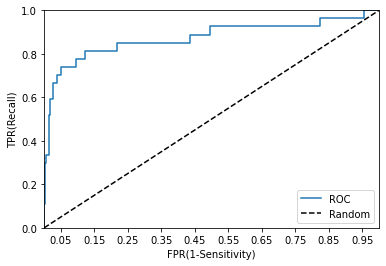

lda의 ROC AUC값: 0.8734


In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(logi_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(logi_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(logi_y_test, lda_clf.predict_proba(logi_x_test)[:,1])
pred_proba = lda_clf.predict_proba(logi_x_test)[:,1]
roc_score = roc_auc_score(logi_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


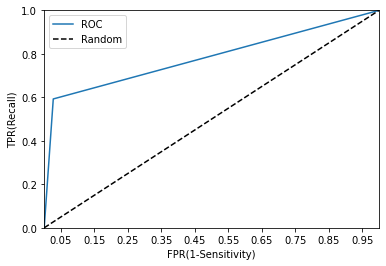

lda의 ROC AUC값: 0.7827


In [84]:
roc_curve_plot(logi_y_test, lda_clf.predict(logi_x_test))
roc_score = roc_auc_score(logi_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

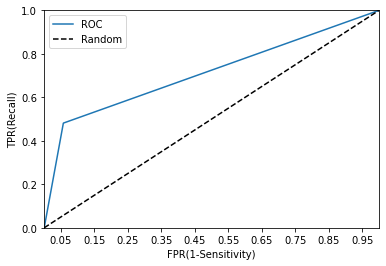

dt ROC AUC값: 0.7121


In [85]:
roc_curve_plot(logi_y_test, dt_clf.predict_proba(logi_x_test)[:,1])
pred_proba = dt_clf.predict_proba(logi_x_test)[:,1]
roc_score = roc_auc_score(logi_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


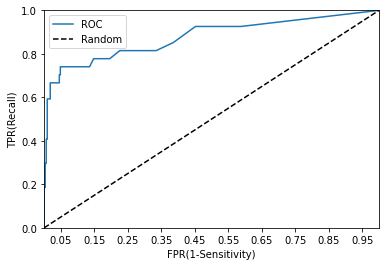

rf ROC AUC값: 0.8763


In [86]:
roc_curve_plot(logi_y_test, rf_clf.predict_proba(logi_x_test)[:,1])
pred_proba = rf_clf.predict_proba(logi_x_test)[:,1]
roc_score = roc_auc_score(logi_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

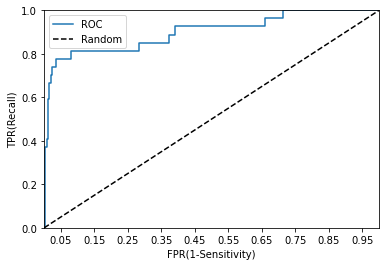

lr ROC AUC값: 0.8995


In [87]:
roc_curve_plot(logi_y_test, lr_clf.predict_proba(logi_x_test)[:,1])
pred_proba = lr_clf.predict_proba(logi_x_test)[:,1]
roc_score = roc_auc_score(logi_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

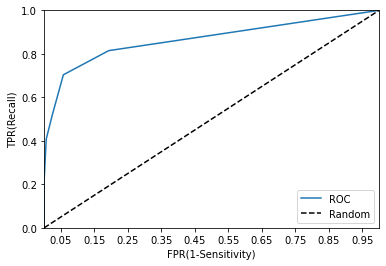

knn ROC AUC값: 0.8659


In [88]:
roc_curve_plot(logi_y_test, knn_clf.predict_proba(logi_x_test)[:,1])
pred_proba = knn_clf.predict_proba(logi_x_test)[:,1]
roc_score = roc_auc_score(logi_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))